In [1]:
# Author: Van Hoan Do <vanhoan310@gmail.com>
# License: BSD 3 clause (C) 2020
from numpy import genfromtxt
from Jvis import TSNE, JTSNE
import numpy as np 
import matplotlib
import pylab as plt
import pandas as pd

In [3]:
rna_matrix = np.genfromtxt('data/cbmc_rna_pca.csv', delimiter=',')
adt_matrix = np.genfromtxt('data/cbmc_adt.csv', delimiter=',')

In [3]:
# method = 'CiteFuse' # 'CiteFuse'
method = 'Specter' # 'Specter'
if method == 'Specter':
    y = np.genfromtxt('data/cbmc_jointspecter_labels.csv', delimiter=',')
    cell_types = ["NK", "pDCs", "Eryth", "CD8+ T", "CD14+ Mono.", "CD4+ T", "DC", "CD34+", "CD16+ Mono.", "MK", "B"] #specter
else:
    y = np.genfromtxt('data/cbmc_citefuse_labels.csv', delimiter=',')
    cell_types = ["CD4+ T", "CD14+ Mono.", "B", "NK", "CD34+", "pDCs", "CD8+ T", "CD16+ Mono.", "Eryth", "DC"] # citefuse
labels_true = y.astype(int)

In [4]:
title_fz = 12
dpi = 200
# dpi = 50
# colors = ['cyan','black', 'gold', 'olive', 'blue', 'silver', 'lime','#fdbf6f','#a6cee3','#cab2d6','magenta','tomato', 'olive',
#                  'cyan','black', 'gold', 'magenta', 'blue', 'silver', 'lime','#fdbf6f','#a6cee3','#cab2d6','#fb9a99','tomato', 'olive']
# colors_map = {"NK":'black', "pDCs":'cyan', "Eryth":'gold', "CD8+ T":'magenta', "CD14+ Mono.":'blue', 
#                   "CD4+ T":'silver', "DC":'lime', "CD34+":'#fdbf6f', "CD16+ Mono.":'#a6cee3', "MK":'#cab2d6', "B":'#fb9a99'}

colors_map = {"NK":'gray', "pDCs":'cyan', "Eryth":'gold', "CD8+ T":'blue', "CD14+ Mono.":'silver', 
                  "CD4+ T":'red', "DC":'lime', "CD34+":'#fdbf6f', "CD16+ Mono.":'#a6cee3', "MK":'#cab2d6', "B":'#fb9a99'}

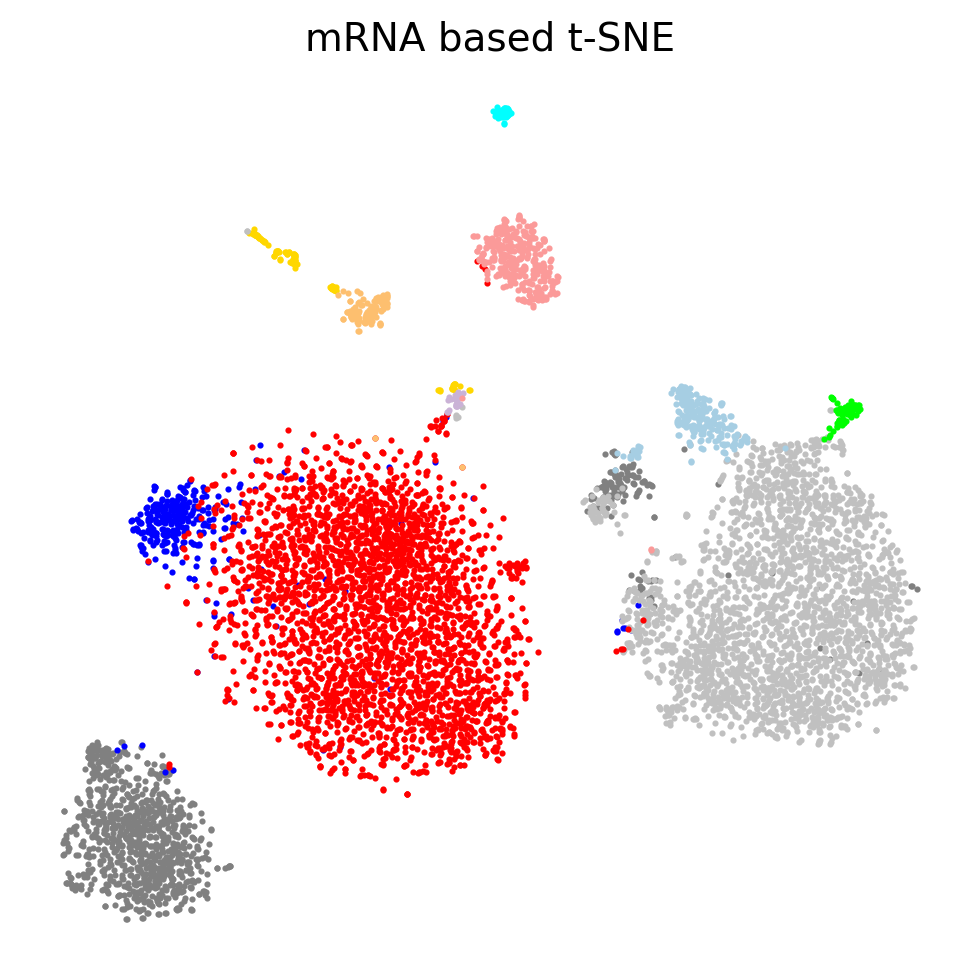

In [5]:
if True:
    #for alpha in [0.0, 1.0]:
    for alpha in [1.0]:
        if alpha==1.0:
            Z = TSNE(init='pca').fit_transform(rna_matrix)
        if alpha==0.0:
            Z = TSNE(init='pca').fit_transform(adt_matrix)

        data2 = pd.DataFrame({'x': Z[:,0], 'y': Z[:,1], 'label': labels_true-np.min(labels_true) + 1})
        plt.figure(figsize=(5, 5), dpi = dpi) # nolegend: 10, legend: 11
        for label in range(1, len(np.unique(labels_true))+1, 1):
            #add data points 
            i = label-1
            plt.scatter(x=data2.loc[data2['label']==label, 'x'], 
                        y=data2.loc[data2['label']==label,'y'], 
                        color=colors_map[cell_types[i]], 
                        s = 1.5, label = cell_types[i])
            plt.tight_layout()
            if alpha == 1.0:
                plt.title("mRNA based t-SNE", fontdict = {'fontsize' : title_fz+2})
            if alpha == 0.0:
                plt.title("ADT based t-SNE", fontdict = {'fontsize' : title_fz+2})
            plt.axis('off')
        if alpha == 1.0:
            plt.savefig('/data/hoan/plots/celltype/cbmc_'+method+'_on_RNAbasedTsne.pdf', dpi = dpi)
        else:
            plt.savefig('/data/hoan/plots/celltype/cbmc_'+method+'_on_ADTbasedTsne.pdf', dpi = dpi)
        plt.show()

In [6]:
Z = TSNE(init='pca').fit_transform(rna_matrix)
data2 = pd.DataFrame({'x': Z[:,0], 'y': Z[:,1], 'label': labels_true-np.min(labels_true) + 1})

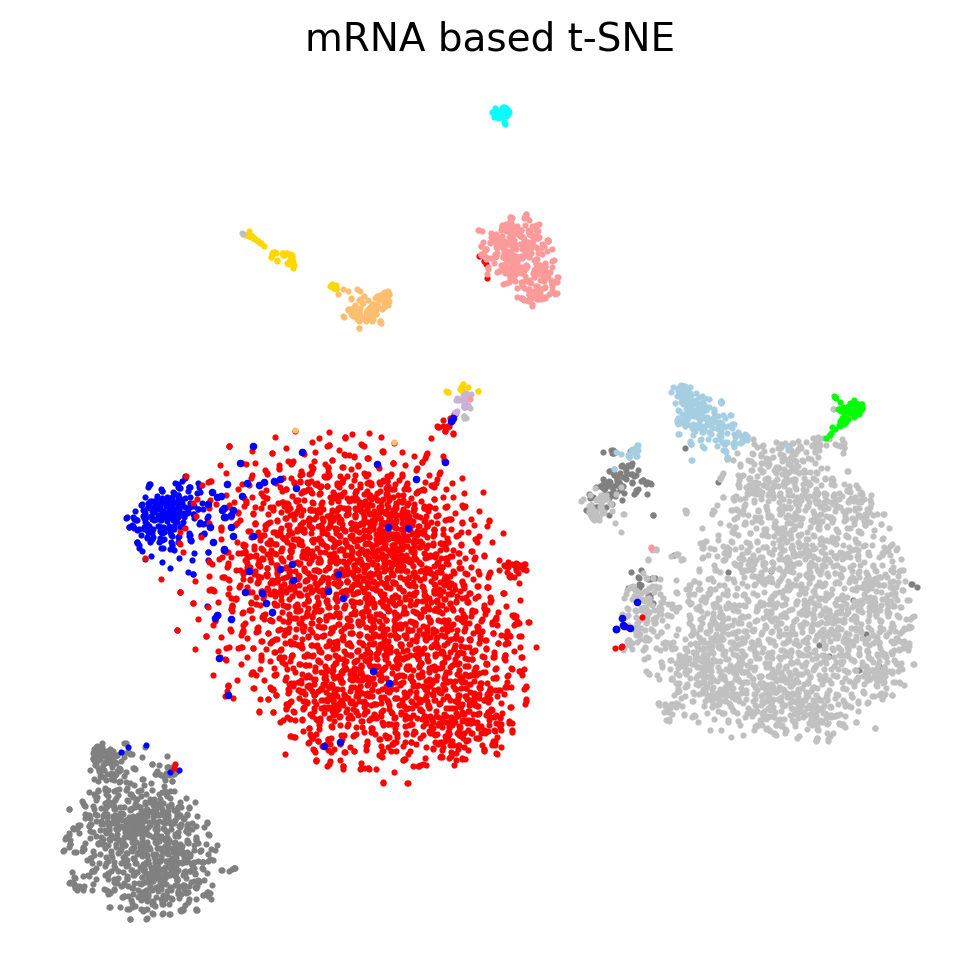

In [7]:
plt.figure(figsize=(5, 5), dpi = dpi) # nolegend: 10, legend: 11
for label in range(1, len(np.unique(labels_true))+1, 1):
    #add data points 
    i = label-1
    plt.scatter(x=data2.loc[data2['label']==label, 'x'], 
                y=data2.loc[data2['label']==label,'y'], 
                color=colors_map[cell_types[i]], 
                s = 1.5, label = cell_types[i])
    plt.tight_layout()
    if alpha == 1.0:
        plt.title("mRNA based t-SNE", fontdict = {'fontsize' : title_fz+2})
    if alpha == 0.0:
        plt.title("ADT based t-SNE", fontdict = {'fontsize' : title_fz+2})
    plt.axis('off')
label = 4
i = label-1
# plt.scatter(x=data2.loc[data2['label']==label, 'x'], 
#             y=data2.loc[data2['label']==label,'y'], 
#             color=colors_map[cell_types[i]], 
#             s = 3.5, label = cell_types[i])
x=data2.loc[data2['label']==label, 'x']
y=data2.loc[data2['label']==label,'y']
selected_cells = x>= -37
plt.scatter(x = x[selected_cells], 
            y=y[selected_cells], 
            color=colors_map[cell_types[i]], 
            s = 3, label = cell_types[i])
# plt.savefig('/data/hoan/plots/celltype/cbmc_'+method+'_on_RNAbasedTsne.pdf', dpi = dpi)
plt.savefig('/data/hoan/plots/celltype/cbmc_'+method+'_on_RNAbasedTsne.eps', dpi = dpi)
plt.show()

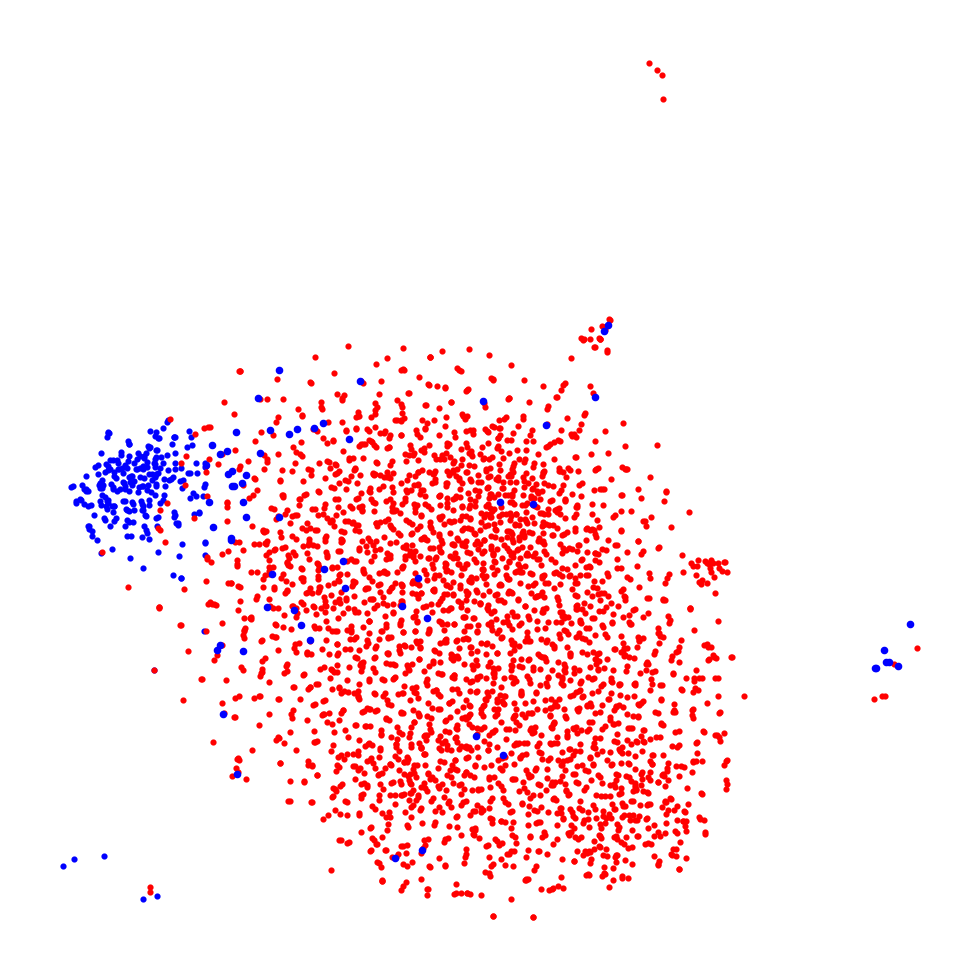

In [8]:
plt.figure(figsize=(5, 5), dpi = dpi) # nolegend: 10, legend: 11
for label in range(1, len(np.unique(labels_true))+1, 1):
    #add data points 
    i = label-1
    if cell_types[i] == "CD4+ T" or cell_types[i] == "CD8+ T":
        plt.scatter(x=data2.loc[data2['label']==label, 'x'], 
                    y=data2.loc[data2['label']==label,'y'], 
                    color=colors_map[cell_types[i]], 
                    s = 1.5, label = cell_types[i])
        plt.tight_layout()
    plt.axis('off')
label = 4
i = label-1
# plt.scatter(x=data2.loc[data2['label']==label, 'x'], 
#             y=data2.loc[data2['label']==label,'y'], 
#             color=colors_map[cell_types[i]], 
#             s = 3.5, label = cell_types[i])
x=data2.loc[data2['label']==label, 'x']
y=data2.loc[data2['label']==label,'y']
selected_cells = x>= -37
plt.scatter(x = x[selected_cells], 
            y=y[selected_cells], 
            color=colors_map[cell_types[i]], 
            s = 3, label = cell_types[i])
# plt.savefig('/data/hoan/plots/celltype/cbmc_'+method+'_on_RNAbasedTsne.pdf', dpi = dpi)
plt.savefig('/data/hoan/plots/celltype/cbmc_Tcells.png', dpi = dpi)
plt.show()

In [9]:
# Joint TSNE
Z = JTSNE(init = 'pca').fit_transform(X = {'adt': adt_matrix, 'rna': rna_matrix})

In [10]:
data2 = pd.DataFrame({'x': Z[:,0], 'y': Z[:,1], 'label': labels_true-np.min(labels_true) + 1})

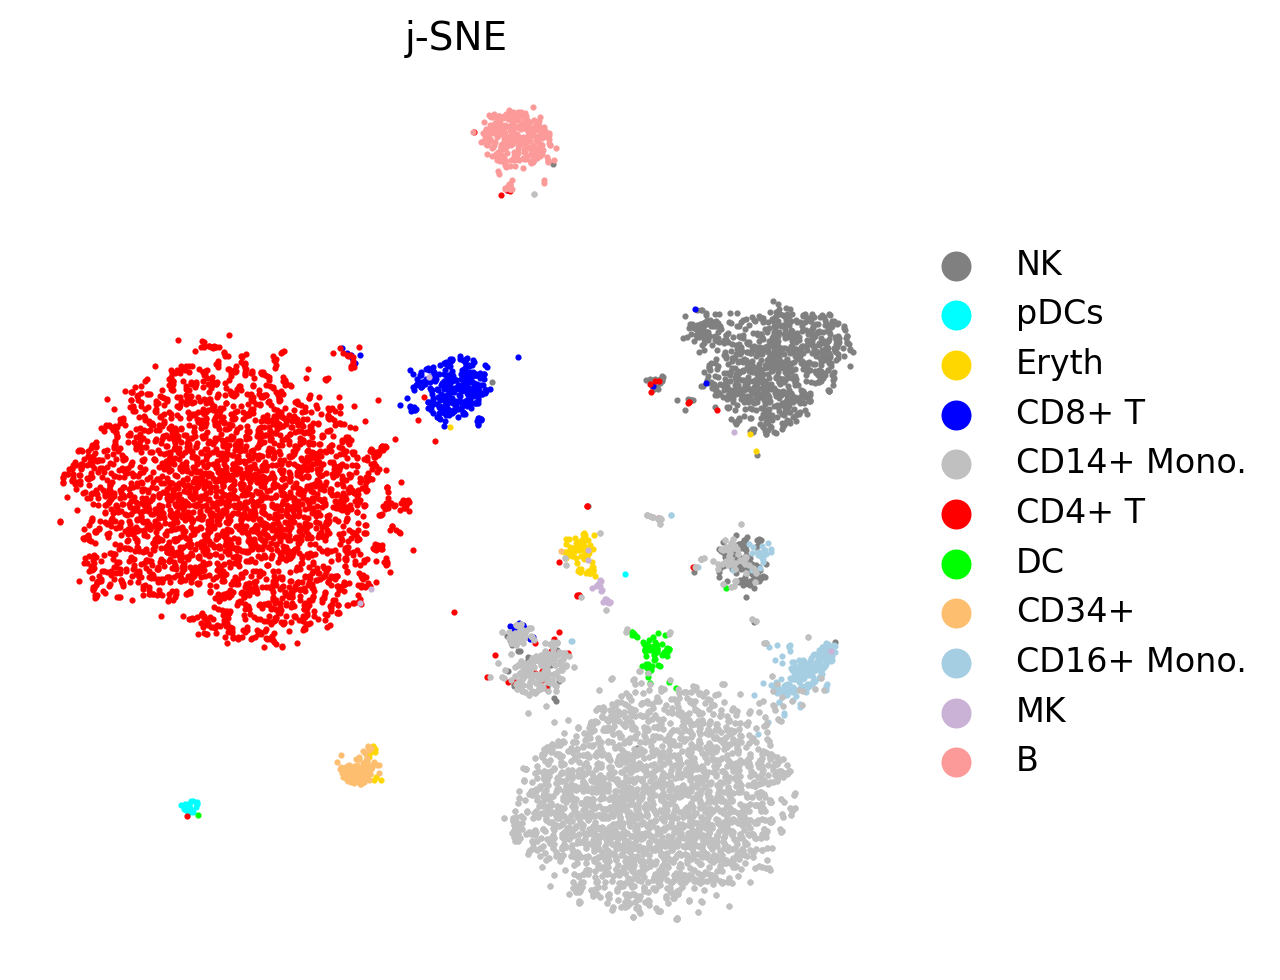

In [11]:
title_fz = 12
plt.figure(figsize=(6.5, 5), dpi = dpi) # nolegend: 10, legend: 11
for label in range(1, len(np.unique(labels_true))+1, 1):
    #add data points 
    i = label-1
    plt.scatter(x=data2.loc[data2['label']==label, 'x'], 
                y=data2.loc[data2['label']==label,'y'], 
                color=colors_map[cell_types[i]], 
                s = 1.5, label = cell_types[i])
    plt.tight_layout()
    plt.title("j-SNE", fontdict = {'fontsize' : title_fz+2})
    plt.legend(loc='center left', numpoints=1, ncol=1, fontsize=title_fz, markerscale=title_fz-4, frameon=False, bbox_to_anchor=(1, 0.5))
    plt.axis('off')
label = 5
i = label-1
plt.scatter(x=data2.loc[data2['label']==label, 'x'], 
            y=data2.loc[data2['label']==label,'y'], 
            color=colors_map[cell_types[i]], 
            s = 1.5)
x=data2.loc[data2['label']==label, 'x']
plt.tight_layout()
plt.title("j-SNE", fontdict = {'fontsize' : title_fz+2})
plt.legend(loc='center left', numpoints=1, ncol=1, fontsize=title_fz, markerscale=title_fz-4, frameon=False, bbox_to_anchor=(1, 0.5))
plt.axis('off')
# plt.savefig('/data/hoan/plots/celltype/cbmc_'+method+'_on_jointTsne.pdf', dpi = dpi)
plt.savefig('/data/hoan/plots/celltype/cbmc_'+method+'_on_jointTsne.pdf', dpi = dpi)
plt.show()

In [12]:
data2.loc[data2['label']=="pDCs", 'x']

/home/vanhoan310/miniconda3/envs/tsne/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Series([], Name: x, dtype: float32)

## Compute KNI and CARI metrics on 4 clusters: CD4, CD8, CD14, DCs (Take intersection of two labels)

In [13]:
# Specter label
specter_labels = np.genfromtxt('data/cbmc_jointspecter_labels.csv', delimiter=',').astype(int)
specter_labels = specter_labels - min(specter_labels) # reindex to start from 0
cell_types = ["NK", "pDCs", "Eryth", "CD8 T", "CD14+ Mono", "CD4 T", "DC", "CD34+", "CD16+ Mono", "MK", "B"] #specter
subtypes = ["CD8 T", "CD14+ Mono", "CD4 T", "DC"]
subtypes_index = [3, 4, 5, 6]

In [14]:
# Citefuse
citefuse_labels = np.genfromtxt('data/cbmc_citefuse_labels.csv', delimiter=',').astype(int)
citefuse_labels = citefuse_labels - min(citefuse_labels) # reindex to start from 0
cell_types2 = ["CD4 T", "CD14+ Mono", "B", "NK", "CD34+", "pDCs", "CD8 T", "CD16+ Mono", "Eryth", "DC"] # citefuse
subtypes_index2 = [0, 1, 6, 9]

In [15]:
cd8 = (specter_labels==3) * (citefuse_labels==6)

In [16]:
cd4 = (specter_labels==5) * (citefuse_labels==0)

In [17]:
cd14 = (specter_labels==4) * (citefuse_labels==1)

In [18]:
dc = (specter_labels==6) * (citefuse_labels==9)

In [19]:
subtypes_cells = cd8 + cd4 +cd14 + dc

In [20]:
sum(subtypes_cells)

5599

In [21]:
subtypes_labels_level = cd8.astype(int) + 2* cd4.astype(int) + 3*cd14.astype(int) + 4*dc.astype(int)

In [22]:
subtypes_labels = subtypes_labels_level[subtypes_labels_level>0]

In [23]:
len(subtypes_labels)

5599

In [24]:
# RNA based tSNE
sub_tsne_rna = TSNE().fit_transform(rna_matrix[subtypes_cells==1])

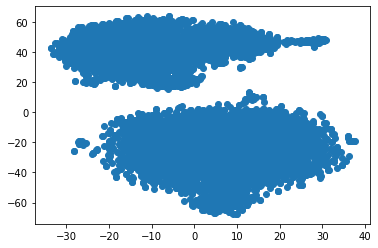

In [25]:
plt.scatter(sub_tsne_rna[:,0], sub_tsne_rna[:, 1])
plt.show()

In [31]:
from sklearn import metrics
#from c_index import (calc_c_index, calc_cindex_clusterSim_implementation)
metrics_name = 'silhouette_score'
def my_metric(X, labels):
#     D = metrics.pairwise_distances(X)
#     return calc_c_index(X, labels)
    if metrics_name == 'calinski_harabasz_score':
        return(metrics.calinski_harabasz_score(X, labels))
    elif metrics_name == 'silhouette_score':
        return(metrics.silhouette_score(X, labels))
    else:
        print("Not implemented yet!")

In [32]:
## Compute two metrics
from joint_metrics import *
kNN = 10
KNI_metrics = KNI(sub_tsne_rna, subtypes_labels, kNN)
CARI_metrics = CARI(sub_tsne_rna, subtypes_labels)
print("KNI: ", KNI_metrics, ", CARI: ", CARI_metrics, "Silhouette: ", my_metric(sub_tsne_rna, subtypes_labels))

KNI:  0.9790676906590463 , CARI:  0.4925475186138461 Silhouette:  0.34379965


In [27]:
# ADT based tSNE
sub_tsne_adt = TSNE().fit_transform(adt_matrix[subtypes_cells==1])

In [33]:
KNI_metrics = KNI(sub_tsne_adt, subtypes_labels, kNN)
CARI_metrics = CARI(sub_tsne_adt, subtypes_labels)
print("KNI: ", KNI_metrics, ", CARI: ", CARI_metrics, my_metric(sub_tsne_adt, subtypes_labels))

KNI:  0.9895695659939275 , CARI:  0.06359112846909099 0.27003443


In [29]:
# joint TSNE
sub_joint_tsne = JTSNE(init='random').fit_transform(X = {'adt': adt_matrix[subtypes_cells==1], 'rna': rna_matrix[subtypes_cells==1]})

In [30]:
## Compute two metrics
KNI_metrics = KNI(sub_joint_tsne, subtypes_labels, kNN)
CARI_metrics = CARI(sub_joint_tsne, subtypes_labels)
print("KNI: ", KNI_metrics, ", CARI: ", CARI_metrics)

KNI:  0.9984818717628148 , CARI:  0.9228672050153668


In [34]:
my_metric(sub_joint_tsne, subtypes_labels)

0.4316409